# Double layer NN for XOR

In [1]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

## NN 2 -> 2 -> 1 fitting just 4 data points (4 quadrants)

In [2]:
# input & output
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 1st layer
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# 2nd layer
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [3]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)
feed_dict={X: x_data, Y: y_data}

## Fitting

In [4]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict=feed_dict))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict=feed_dict)
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.7539022
4000 0.07765333
8000 0.019331548
12000 0.010752726
16000 0.0074065193
20000 0.005636263

Hypothesis:  [[0.00543502]
 [0.9925742 ]
 [0.9950447 ]
 [0.00466315]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0


# XOR dataset from Python Machine Learning

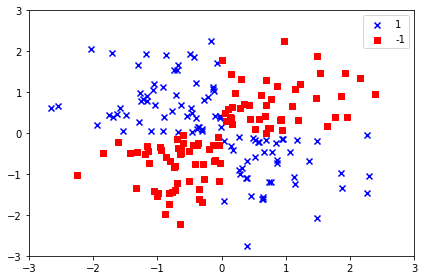

In [5]:
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

[[False],
 [False],
 [True],
 [True],
 [True],
 [False],
 [False],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [False],
 [False],
 [False],
 [True],
 [False],
 [False],
 [False],
 [True],
 [False],
 [True],
 [False],
 [True],
 [False],
 [True],
 [False],
 [False],
 [False],
 [False],
 [True],
 [True],
 [True],
 [False],
 [True],
 [True],
 [False],
 [True],
 [True],
 [True],
 [False],
 [True],
 [True],
 [True],
 [False],
 [False],
 [False],
 [False],
 [True],
 [True],
 [True],
 [False],
 [False],
 [False],
 [True],
 [True],
 [True],
 [False],
 [True],
 [False],
 [False],
 [True],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [False],
 [False],
 [True],
 [False],
 [True],
 [False],
 [False],
 [True],
 [False],
 [True],
 [False],
 [True],
 [False],
 [False],
 [False],
 [True],
 [True],
 [False],
 [True],
 [False],
 [False],
 [True],
 [True],
 [True],
 [True],
 [False],
 [True],
 [False],
 [False],
 [False],
 [False],
 [True],
 [False],
 [True],
 [Fa

In [28]:
x_data = X_xor
y_data = (y_xor>0).reshape(-1,1).tolist()
feed_dict={X: x_data, Y: y_data}

## Trains the same 2 -> 2 -> 1 NN model

In [31]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    print( sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) )
    y_pred = sess.run(predicted, feed_dict={X: x_data, Y: y_data})

0 0.96975416
4000 0.45632035
8000 0.45101893
12000 0.44812977
16000 0.44592798
20000 0.44392082
0.795


### Can't fit

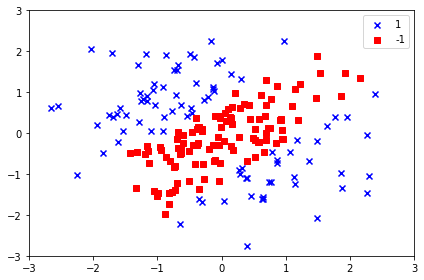

In [18]:
y_pred = np.squeeze(y_pred)

plt.scatter(X_xor[y_pred == 1, 0],
            X_xor[y_pred == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_pred == 0, 0],
            X_xor[y_pred == 0, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

## Now let's try 2 -> 3 -> 3 -> 1 NN

In [32]:
# input & output
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 1st layer
W1 = tf.Variable(tf.random_normal([2, 3]), name='weight1')
b1 = tf.Variable(tf.random_normal([3]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# 2st layer
W2 = tf.Variable(tf.random_normal([3, 3]), name='weight2')
b2 = tf.Variable(tf.random_normal([3]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# 3nd layer
W3 = tf.Variable(tf.random_normal([3, 1]), name='weight3')
b3 = tf.Variable(tf.random_normal([1]), name='bias3')
hypothesis = tf.sigmoid(tf.matmul(layer2, W3) + b3)

# cost/loss function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [33]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    print( sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) )
    y_pred = sess.run(predicted, feed_dict={X: x_data, Y: y_data})

0 0.8494826
4000 0.34475717
8000 0.2335304
12000 0.19148427
16000 0.1621264
20000 0.12107172
0.955


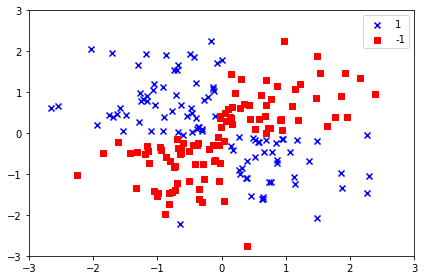

In [34]:
y_pred = np.squeeze(y_pred)

plt.scatter(X_xor[y_pred == 1, 0],
            X_xor[y_pred == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_pred == 0, 0],
            X_xor[y_pred == 0, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

## Keras Example

In [35]:
import tensorflow as tf
import tensorflow.contrib.keras as keras
# If error, make update `dask` package in conda
# conda upgrade dask
# conda install tornado=4.5.3

D:\sw\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [36]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units=3,  
        input_dim=2,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=3,    
        input_dim=3,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=1,    
        input_dim=3,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='sigmoid'))

sgd_optimizer = keras.optimizers.SGD(
        lr=0.11, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer,
              loss='binary_crossentropy')

In [37]:
history = model.fit(x_data, np.squeeze(y_data),
                    batch_size=200, epochs=75,
                    verbose=1,
                    validation_split=0.1)

Train on 180 samples, validate on 20 samples
Epoch 1/75
180/180 [==============================] - 0s - loss: 0.6967 - val_loss: 0.7087
Epoch 2/75
180/180 [==============================] - 0s - loss: 0.6944 - val_loss: 0.7049
Epoch 3/75
180/180 [==============================] - 0s - loss: 0.6901 - val_loss: 0.6998
Epoch 4/75
180/180 [==============================] - 0s - loss: 0.6844 - val_loss: 0.6941
Epoch 5/75
180/180 [==============================] - 0s - loss: 0.6779 - val_loss: 0.6882
Epoch 6/75
180/180 [==============================] - 0s - loss: 0.6709 - val_loss: 0.6825
Epoch 7/75
180/180 [==============================] - 0s - loss: 0.6639 - val_loss: 0.6773
Epoch 8/75
180/180 [==============================] - 0s - loss: 0.6571 - val_loss: 0.6728
Epoch 9/75
180/180 [==============================] - 0s - loss: 0.6508 - val_loss: 0.6691
Epoch 10/75
180/180 [==============================] - 0s - loss: 0.6450 - val_loss: 0.6661
Epoch 11/75
180/180 [=======================

In [38]:
y_pred.shape

(200,)

In [42]:
y_pred = model.predict_classes(x_data, verbose=0)
correct_preds = np.sum(y_pred == y_data, axis=0) 
sum(correct_preds)/200

0.985

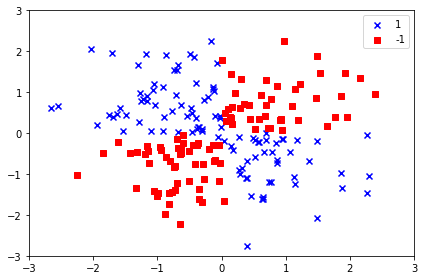

In [43]:
y_pred = np.squeeze(y_pred)

plt.scatter(X_xor[y_pred == 1, 0],
            X_xor[y_pred == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_pred == 0, 0],
            X_xor[y_pred == 0, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()